<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Time_Series/Finding_arima_parametes_air_passanger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/Time_Series/AirPassengers.csv',parse_dates=False)

In [ ]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [ ]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
data['Month']=data['Month'].apply(lambda x:dt(int(x[:4]),int(x[5:]),15))
data=data.set_index('Month')

In [ ]:
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [ ]:
ts=data['#Passengers']

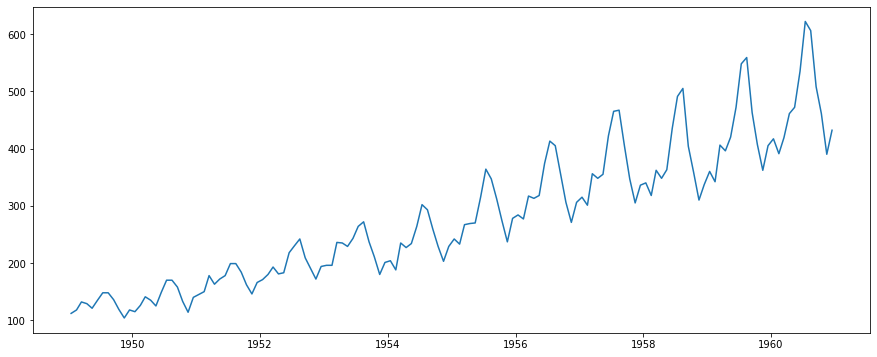

In [ ]:
plt.plot(ts)

In [ ]:
ts_log=np.log(ts)

In [ ]:
def test_stationarity(time_series):
    rollmean=time_series.rolling(window=52,center=False).mean()
    rollstd=time_series.rolling(window=52,center=False).std()
    orig=plt.plot(time_series,color='blue',label='Original')
    mean=plt.plot(rollmean,color='red',label='Rolling Mean')
    std=plt.plot(rollstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print("Result of Dicky Fuller Test")
    dftest=adfuller(time_series,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-Value','#Lags Used','Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

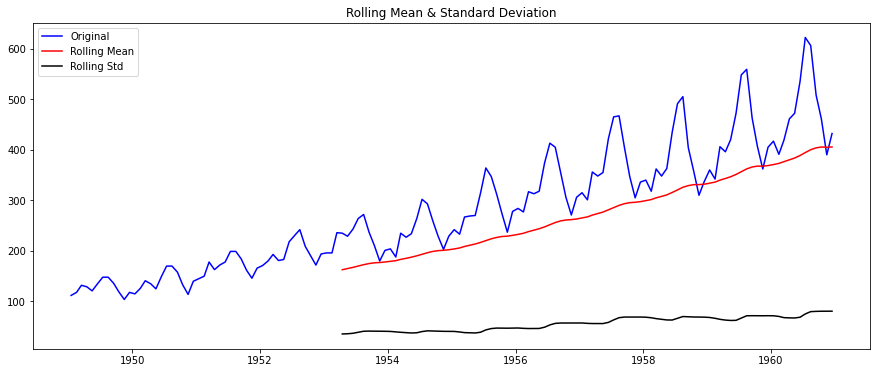

Result of Dicky Fuller Test
Test Statistics                  0.815369
P-Value                          0.991880
#Lags Used                      13.000000
Number of Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data['#Passengers'])

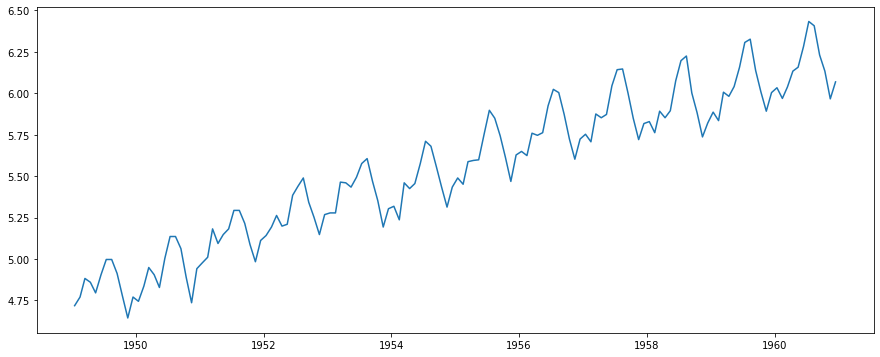

In [ ]:
plt.plot(ts_log)

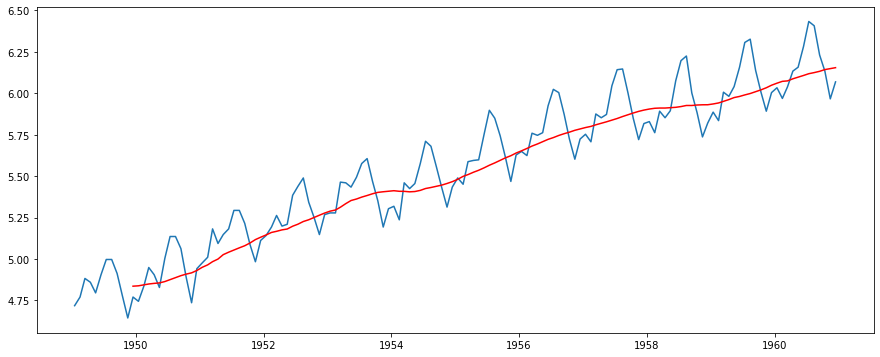

In [ ]:
movingAvg=ts_log.rolling(window=12).mean()
movingSTD=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAvg,color='red')

In [ ]:
ts_log_mv_diff=ts_log-movingAvg

In [ ]:
ts_log_mv_diff.head(12)

Month
1949-01-15         NaN
1949-02-15         NaN
1949-03-15         NaN
1949-04-15         NaN
1949-05-15         NaN
1949-06-15         NaN
1949-07-15         NaN
1949-08-15         NaN
1949-09-15         NaN
1949-10-15         NaN
1949-11-15         NaN
1949-12-15   -0.065494
Name: #Passengers, dtype: float64

In [ ]:
ts_log_mv_diff.dropna(inplace=True)

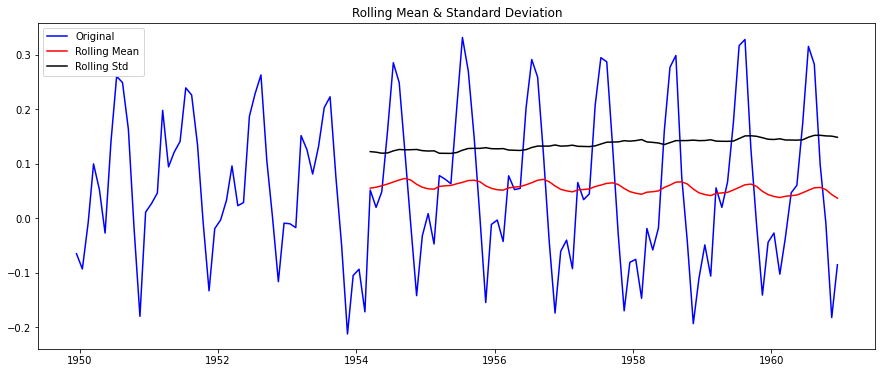

Result of Dicky Fuller Test
Test Statistics                 -3.162908
P-Value                          0.022235
#Lags Used                      13.000000
Number of Observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
test_stationarity(ts_log_mv_diff)

In [ ]:
import pmdarima as pm

In [ ]:
#!pip install pmdarima 

In [ ]:
smodel = pm.auto_arima(ts_log_mv_diff, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=-254.090, BIC=-242.528, Time=0.122 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=-152.169, BIC=-146.389, Time=0.055 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=-233.989, BIC=-225.318, Time=0.062 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=-246.526, BIC=-237.855, Time=0.084 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=-133.698, BIC=-130.807, Time=0.021 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=-279.238, BIC=-264.786, Time=0.343 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=-260.142, BIC=-248.581, Time=0.074 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=-277.308, BIC=-259.966, Time=0.438 seconds
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=-277.477, BIC=-260.135, Time=0.489 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=-252.154, BIC=-237.702, Time=0.271 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(2, 0, 3)   Log Likelihood                 163.755
Date:                Thu, 23 Jul 2020   AIC                           -313.509
Time:                        16:53:30   BIC                           -293.277
Sample:                             0   HQIC                          -305.288
                                - 133                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0144      0.002      6.778      0.000       0.010       0.019
ar.L1          1.7325      0.009    203.099      0.000       1.716       1.749
ar.L2         -0.9946      0.009   -112.915      0.000      -1.012      -0.977
ma.L1         -1.1322      0.124     -9.157      0.000      -1.374      -0.890
ma.L2         -0.1599      0.143     -1.116      0.264      -0.441       0.121
ma.L3          0.6324      0.122      5.165      0.000       0.392       0.872
sigma2         0.0047      0.001      5.636      0.000       0.003       0.006
===================================================================================
Ljung-Box (Q):                      311.03   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.00   Prob(JB):                         0.31
Heteroskedasticity (H):               1.02   Skew:                            -0.09
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

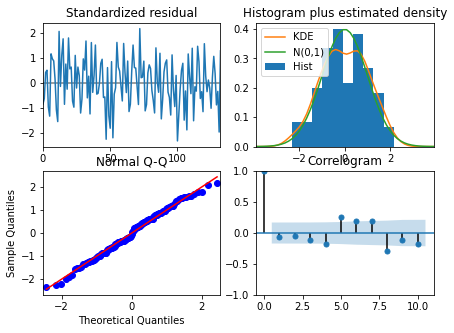

In [ ]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

                              ARMA Model Results                              
Dep. Variable:            #Passengers   No. Observations:                  133
Model:                     ARMA(2, 3)   Log Likelihood                 151.052
Method:                       css-mle   S.D. of innovations                nan
Date:                Thu, 23 Jul 2020   AIC                           -288.104
Time:                        16:55:13   BIC                           -267.872
Sample:                             0   HQIC                          -279.883
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0543      0.000    283.097      0.000       0.054       0.055
ar.L1.#Passengers     1.7328      0.003    521.010      0.000       1.726       1.739
ar.L2.#Passengers    -1.

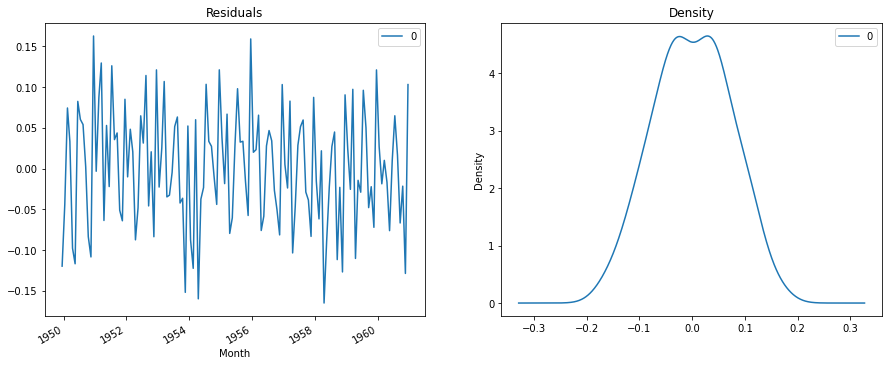

In [ ]:
model = ARIMA(ts_log_mv_diff, order=(2,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

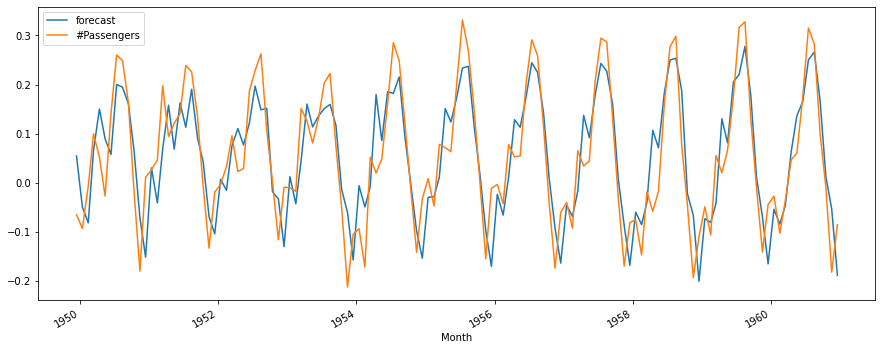

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()